DATACON COMPETITION NIRANJAN DHOKARIKAR

IMPORTING THE LIBRARIES AND THE DATASETS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv("train.csv")
data = pd.read_csv("test.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,6,7,10,11,12,13,14,17,18,21) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


DATA CLEANING AND ANALYSIS OF THE TRAINING AND THE TESTING DATA

In [3]:
dataset

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,allocated _memory,total_processing_time
0,1,131.760000,vp8,640,480,104723.0,25.145,37,3257.0,0.0,3294,945865,778937,0,1.7248e+06,flv,539000.0,24,640,480.0,221152.0,1.048
1,2,189.956000,flv,320,240,231296.0,29,97,5597.0,0.0,5694,580292,4.91173e+06,0,5.49203e+06,flv,109000.0,29.97,320,240.0,218664.0,-0.468
2,3,110.966995,h264,480,360,NaN,30,59,3271.0,0.0,3330,529627,4.97866e+06,0,5.50829e+06,h264,56000.0,15,320,240.0,216820.0,3.696
3,4,95.462000,h264,640,480,809256.0,29,51,2811.0,0.0,2862,886496,8.77016e+06,0,9.65666e+06,vp8,109000.0,12,320,240.0,221160.0,3.452
4,5,63.667000,h264,640,480,972572.0,15,33,923.0,0.0,956,1.25966e+06,6.48044e+06,0,7.7401e+06,flv,56000.0,24,1280,720.0,219656.0,2.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48145,48146,34.168000,vp8,480,360,186895.0,30.029411,16,1005.0,0.0,1021,238485,559745,-16,798230,NaN,56000.0,29.97,1280,720.0,165700.0,16.469
48146,48147,67.583336,mpeg4,176,144,51225.0,12,15,777.0,0.0,792,47585,385164,0,432749,vp8,5000000.0,12,1920,1080.0,219480.0,22.417
48147,48148,581.233000,h264,480,360,295979.0,30,310,17128.0,0.0,17438,10151572,11352574,0,21504146,vp8,5000000.0,15,640,480.0,218932.0,6.46
48148,48149,645.840000,vp8,320,240,95903.0,25.032558,138,16008.0,0.0,16146,1081321,6660941,0,7742262,vp8,539000.0,29.97,176,144.0,219196.0,1.976


In [4]:
dataset.isnull().sum()

id                         0
video_duration            13
coding_standard            8
width                     20
height                     6
bitrate                   12
framerate                 17
i_frames                   9
p_frames                  25
b_frames                   5
frames                    21
i_size                    30
p_size                    35
b_size                     0
size                      32
coding_standard_output    37
bitrate_output            22
framerate_output           8
output_width               7
output_height             15
allocated _memory         20
total_processing_time      3
dtype: int64

In [5]:
dataset.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                      object
height                     object
bitrate                   float64
framerate                  object
i_frames                   object
p_frames                  float64
b_frames                  float64
frames                     object
i_size                     object
p_size                     object
b_size                     object
size                       object
coding_standard_output     object
bitrate_output            float64
framerate_output           object
output_width               object
output_height             float64
allocated _memory         float64
total_processing_time      object
dtype: object

In [6]:
dataset.rename(columns = {'allocated _memory':'Allocated_memory'}, inplace = True)
data.rename(columns = {'allocated _memory':'Allocated_memory'}, inplace = True)

REMOVING THE CHARACTERS PRESENT IN SOME OF THE COLUMNS IN THE TRAINING SET

In [7]:
dataset = dataset[dataset['total_processing_time'] != '#NAME?']
dataset = dataset[(dataset['coding_standard_output'] != '0')]

In [8]:
column_names = ['video_duration', 'coding_standard', 'width', 'height', 'bitrate',
       'framerate', 'i_frames', 'p_frames', 'b_frames', 'frames', 'i_size',
       'p_size', 'b_size', 'size', 'coding_standard_output', 'bitrate_output',
       'framerate_output', 'output_width', 'output_height',
       'Allocated_memory', 'total_processing_time']

In [9]:
for i in column_names:
    dataset = dataset[dataset[i] != '#NAME?']
    dataset = dataset[dataset[i] != '-']

CONVERTING THE OBJECT DATATYPES TO FLOAT ONES

In [10]:
dataset["width"] = pd.to_numeric(dataset["width"], errors='coerce')
dataset["height"] = pd.to_numeric(dataset["height"],errors='coerce')
dataset["framerate"] = pd.to_numeric(dataset["framerate"],errors='coerce')
dataset["i_frames"] = pd.to_numeric(dataset["i_frames"],errors='coerce')
dataset["i_size"] = pd.to_numeric(dataset["i_size"],errors='coerce')
dataset["size"] = pd.to_numeric(dataset["size"],errors='coerce')
dataset["p_size"] = pd.to_numeric(dataset["p_size"],errors='coerce')
dataset["b_size"] = pd.to_numeric(dataset["b_frames"],errors='coerce')
dataset["frames"] = pd.to_numeric(dataset["frames"],errors='coerce')
dataset["framerate_output"] = pd.to_numeric(dataset["framerate_output"],errors='coerce')
dataset["output_width"] = pd.to_numeric(dataset["output_width"],errors='coerce')
dataset["total_processing_time"] = pd.to_numeric(dataset['total_processing_time'],errors='coerce')

In [11]:
dataset.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                     float64
height                    float64
bitrate                   float64
framerate                 float64
i_frames                  float64
p_frames                  float64
b_frames                  float64
frames                    float64
i_size                    float64
p_size                    float64
b_size                    float64
size                      float64
coding_standard_output     object
bitrate_output            float64
framerate_output          float64
output_width              float64
output_height             float64
Allocated_memory          float64
total_processing_time     float64
dtype: object

REPLACING THE MISSING OR NAN VALUES

In [12]:
dataset["width"].fillna( method ='ffill', inplace = True) 
dataset["height"].fillna( method ='ffill', inplace = True) 

#dataset['width'].fillna((dataset['width'].mean()), inplace=True)
#dataset['height'].fillna((dataset['height'].mean()), inplace=True)
dataset['framerate'].fillna((dataset['framerate'].mean()), inplace=True)
dataset['i_frames'].fillna((dataset['i_frames'].mean()), inplace=True)
dataset['frames'].fillna((dataset['frames'].mean()), inplace=True)
dataset['i_size'].fillna((dataset['i_size'].mean()), inplace=True)
dataset['p_size'].fillna((dataset['p_size'].mean()), inplace=True)
dataset['b_size'].fillna((dataset['b_size'].mean()), inplace=True)
dataset['size'].fillna((dataset['size'].mean()), inplace=True)
dataset['framerate_output'].fillna((dataset['framerate_output'].mean()), inplace=True)
dataset['output_width'].fillna((dataset['output_width'].mean()), inplace=True)

dataset['video_duration'].fillna((dataset['video_duration'].mean()), inplace=True)
dataset['output_height'].fillna((dataset['output_height'].mean()), inplace=True)
dataset['Allocated_memory'].fillna((dataset['Allocated_memory'].mean()), inplace=True)
dataset['b_frames'].fillna((dataset['b_frames'].mean()), inplace=True)
dataset['p_frames'].fillna((dataset['p_frames'].mean()), inplace=True)
dataset['bitrate'].fillna((dataset['bitrate'].mean()), inplace=True)
dataset['bitrate_output'].fillna((dataset['bitrate_output'].mean()), inplace=True)
dataset['total_processing_time'].fillna((dataset['total_processing_time'].mean()), inplace=True)

cols=["coding_standard","coding_standard_output"]
for i in cols:
    dataset[i].fillna(dataset[i].mode()[0],inplace=True)
    data[i].fillna(data[i].mode()[0],inplace=True)

In [13]:
dataset.isnull().sum()

id                        0
video_duration            0
coding_standard           0
width                     0
height                    0
bitrate                   0
framerate                 0
i_frames                  0
p_frames                  0
b_frames                  0
frames                    0
i_size                    0
p_size                    0
b_size                    0
size                      0
coding_standard_output    0
bitrate_output            0
framerate_output          0
output_width              0
output_height             0
Allocated_memory          0
total_processing_time     0
dtype: int64

FINDING THE IMPORTANT FEATURES 

In [14]:
print("Finding the most important features for making the predictions")
corr = dataset.corr()
corr.sort_values(["total_processing_time"],ascending = False,inplace = True)
print(corr.total_processing_time)

Finding the most important features for making the predictions
total_processing_time    1.000000
bitrate                  0.153076
height                   0.124954
output_height            0.073835
p_frames                 0.031333
p_size                   0.020943
width                    0.017510
output_width             0.010565
b_frames                 0.004510
b_size                   0.004510
id                       0.003583
video_duration           0.003300
Allocated_memory         0.003067
bitrate_output           0.001829
frames                   0.000699
framerate_output        -0.001366
i_size                  -0.001880
size                    -0.001964
i_frames                -0.002494
framerate               -0.002582
Name: total_processing_time, dtype: float64


CHECKING FOR DATATYPES AND MISSING VALUES IF ANY

In [15]:
dataset.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                     float64
height                    float64
bitrate                   float64
framerate                 float64
i_frames                  float64
p_frames                  float64
b_frames                  float64
frames                    float64
i_size                    float64
p_size                    float64
b_size                    float64
size                      float64
coding_standard_output     object
bitrate_output            float64
framerate_output          float64
output_width              float64
output_height             float64
Allocated_memory          float64
total_processing_time     float64
dtype: object

In [16]:
dataset.isnull().sum()

id                        0
video_duration            0
coding_standard           0
width                     0
height                    0
bitrate                   0
framerate                 0
i_frames                  0
p_frames                  0
b_frames                  0
frames                    0
i_size                    0
p_size                    0
b_size                    0
size                      0
coding_standard_output    0
bitrate_output            0
framerate_output          0
output_width              0
output_height             0
Allocated_memory          0
total_processing_time     0
dtype: int64

In [17]:
dataset

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,total_processing_time
0,1,131.760000,vp8,640.0,480.0,1.047230e+05,25.145039,37.0,3257.0,0.0,3294.0,945865.0,778937.0,0.0,1724802.0,flv,539000.0,24.00,640.0,480.0,221152.0,1.048
1,2,189.956000,flv,320.0,240.0,2.312960e+05,29.000000,97.0,5597.0,0.0,5694.0,580292.0,4911734.0,0.0,5492026.0,flv,109000.0,29.97,320.0,240.0,218664.0,-0.468
2,3,110.966995,h264,480.0,360.0,6.927853e+05,30.000000,59.0,3271.0,0.0,3330.0,529627.0,4978664.0,0.0,5508291.0,h264,56000.0,15.00,320.0,240.0,216820.0,3.696
3,4,95.462000,h264,640.0,480.0,8.092560e+05,29.000000,51.0,2811.0,0.0,2862.0,886496.0,8770159.0,0.0,9656655.0,vp8,109000.0,12.00,320.0,240.0,221160.0,3.452
4,5,63.667000,h264,640.0,480.0,9.725720e+05,15.000000,33.0,923.0,0.0,956.0,1259657.0,6480438.0,0.0,7740095.0,flv,56000.0,24.00,1280.0,720.0,219656.0,2.692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48145,48146,34.168000,vp8,480.0,360.0,1.868950e+05,30.029411,16.0,1005.0,0.0,1021.0,238485.0,559745.0,0.0,798230.0,mpeg4,56000.0,29.97,1280.0,720.0,165700.0,16.469
48146,48147,67.583336,mpeg4,176.0,144.0,5.122500e+04,12.000000,15.0,777.0,0.0,792.0,47585.0,385164.0,0.0,432749.0,vp8,5000000.0,12.00,1920.0,1080.0,219480.0,22.417
48147,48148,581.233000,h264,480.0,360.0,2.959790e+05,30.000000,310.0,17128.0,0.0,17438.0,10151572.0,11352574.0,0.0,21504146.0,vp8,5000000.0,15.00,640.0,480.0,218932.0,6.460
48148,48149,645.840000,vp8,320.0,240.0,9.590300e+04,25.032558,138.0,16008.0,0.0,16146.0,1081321.0,6660941.0,0.0,7742262.0,vp8,539000.0,29.97,176.0,144.0,219196.0,1.976


In [18]:
dataset.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                     float64
height                    float64
bitrate                   float64
framerate                 float64
i_frames                  float64
p_frames                  float64
b_frames                  float64
frames                    float64
i_size                    float64
p_size                    float64
b_size                    float64
size                      float64
coding_standard_output     object
bitrate_output            float64
framerate_output          float64
output_width              float64
output_height             float64
Allocated_memory          float64
total_processing_time     float64
dtype: object

GENERATING THE OUTLIERS

BITRATE COLUMN

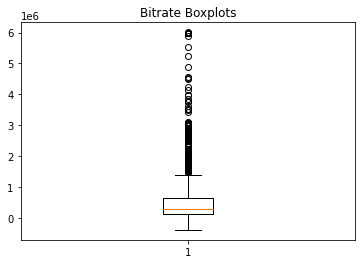

1391835.0

In [19]:
A1=plt.boxplot(dataset['bitrate'])
plt.title('Bitrate Boxplots')
plt.show()
a1=[noddy.get_ydata()[1] for noddy in A1['whiskers']]
b1=a1[1]
b1

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e83c71d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e83c7be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e83d06a0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e83d0320>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e83c74e0>,
  <matplotlib.lines.Line2D at 0x7fe8e83c7860>]}

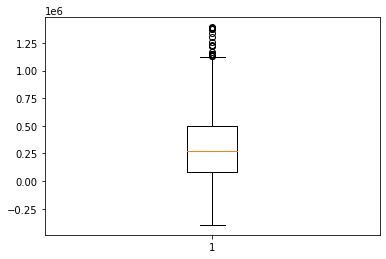

In [20]:
dataset[dataset['bitrate']>b1]    
dataset = dataset.drop(dataset[dataset.bitrate > b1 ].index)
plt.boxplot(dataset['bitrate'])

FRAMERATE COLUMN

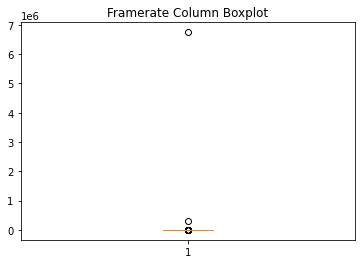

35.0

In [21]:
A2=plt.boxplot(dataset['framerate'])
plt.title('Framerate Column Boxplot')
plt.show()
a2=[noddy.get_ydata()[1] for noddy in A2['whiskers']]
b2=a2[1]
b2

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e829abe0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e82a9630>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e82b30f0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e82a9d30>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e829aef0>,
  <matplotlib.lines.Line2D at 0x7fe8e82a92b0>]}

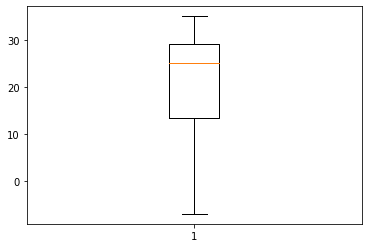

In [22]:
dataset[dataset['framerate']>b2]    
dataset = dataset.drop(dataset[dataset.framerate > b2 ].index)
plt.boxplot(dataset['framerate'])

FRAMES COLUMN

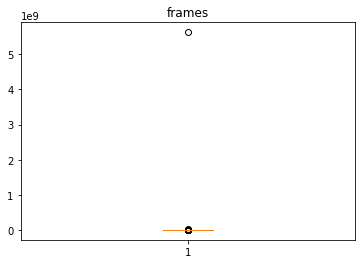

19451.0

In [23]:
A4=plt.boxplot(dataset['frames'])
plt.title('frames')
plt.show()
a4=[noddy.get_ydata()[1] for noddy in A4['whiskers']]
b4=a4[1]
b4

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e81e5160>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e81e5b70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e81f2630>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e81f22b0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e81e5470>,
  <matplotlib.lines.Line2D at 0x7fe8e81e57f0>]}

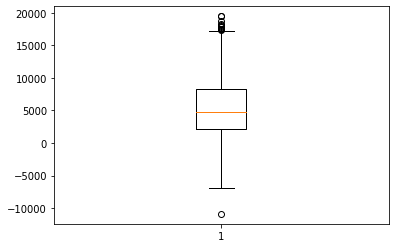

In [24]:
dataset[dataset['frames']>b4]    
dataset = dataset.drop(dataset[dataset.frames > b4 ].index)
plt.boxplot(dataset['frames'])

VIDEO DURATION COLUMN

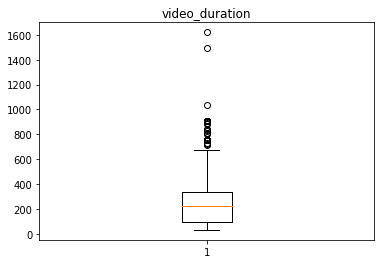

673.285

In [25]:
A3=plt.boxplot(dataset['video_duration'])
plt.title('video_duration')
plt.show()
a3=[noddy.get_ydata()[1] for noddy in A3['whiskers']]
b3=a3[1]
b3

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e8122ba8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e812e5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e81370b8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e812ecf8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e8122eb8>,
  <matplotlib.lines.Line2D at 0x7fe8e812e278>]}

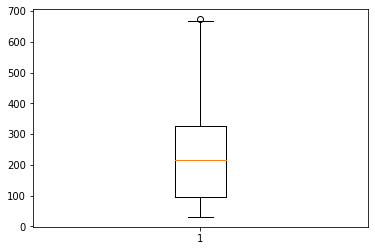

In [26]:
dataset[dataset['video_duration']>b3]    
dataset = dataset.drop(dataset[dataset.video_duration > b3 ].index)
plt.boxplot(dataset['video_duration'])

I SIZE COLUMN

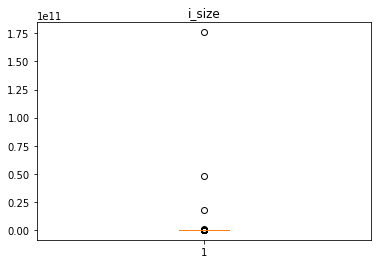

4317257.0

In [27]:
A5=plt.boxplot(dataset['i_size'])
plt.title('i_size')
plt.show()
a5=[noddy.get_ydata()[1] for noddy in A5['whiskers']]
b5=a5[1]
b5

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e8074780>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e80801d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e8080c50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e80808d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e8074a90>,
  <matplotlib.lines.Line2D at 0x7fe8e8074e10>]}

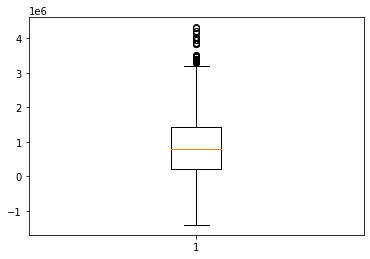

In [28]:
dataset[dataset['i_size']>b5]    
dataset = dataset.drop(dataset[dataset.i_size > b5 ].index)
plt.boxplot(dataset['i_size'])

P SIZE COLUMN

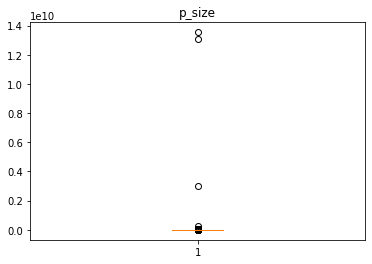

16193885.0

In [29]:
A6=plt.boxplot(dataset['p_size'])
plt.title('p_size')
plt.show()
a6=[noddy.get_ydata()[1] for noddy in A6['whiskers']]
b6=a6[1]
b6

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e7fc0668>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e7fce0b8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e7fceb38>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e7fce7b8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e7fc0978>,
  <matplotlib.lines.Line2D at 0x7fe8e7fc0cf8>]}

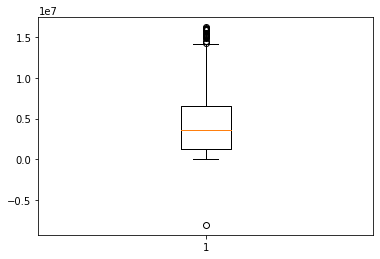

In [30]:
dataset[dataset['p_size']>b6]    
dataset = dataset.drop(dataset[dataset.p_size > b6 ].index)
plt.boxplot(dataset['p_size'])

BITRATE OUTPUT COLUMN

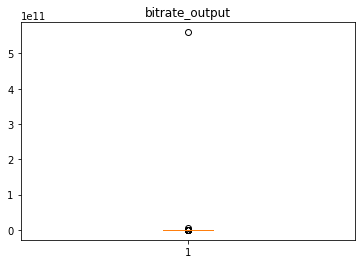

5000000.0

In [31]:
A8=plt.boxplot(dataset['bitrate_output'])
plt.title('bitrate_output')
plt.show()
a8=[noddy.get_ydata()[1] for noddy in A8['whiskers']]
b8=a8[1]
b8

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e7f0a240>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e7f0ac50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e7e96710>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e7e96390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e7f0a550>,
  <matplotlib.lines.Line2D at 0x7fe8e7f0a8d0>]}

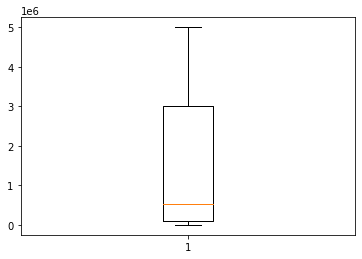

In [32]:
dataset[dataset['bitrate_output']>b8]    
dataset = dataset.drop(dataset[dataset.bitrate_output > b8 ].index)
plt.boxplot(dataset['bitrate_output'])

ALLOCATED MEMORY COLUMN

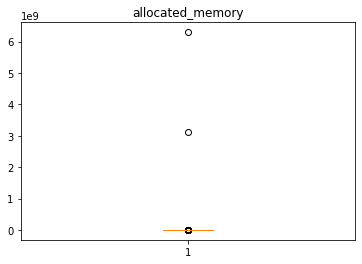

210564.0

In [33]:
A9=plt.boxplot(dataset['Allocated_memory'])
plt.title('allocated_memory')
plt.show()
a9=[noddy.get_ydata()[1] for noddy in A9['whiskers']]
b9=a9[0]
b9

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e7e4e908>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e7dde358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e7ddedd8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e7ddea58>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e7e4ec18>,
  <matplotlib.lines.Line2D at 0x7fe8e7e4ef98>]}

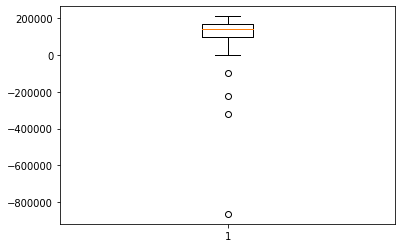

In [34]:
dataset[dataset['Allocated_memory']>b9]    
dataset = dataset.drop(dataset[dataset.Allocated_memory > b9 ].index)
plt.boxplot(dataset['Allocated_memory'])

{'boxes': [<matplotlib.lines.Line2D at 0x7fe8e7db8470>],
 'caps': [<matplotlib.lines.Line2D at 0x7fe8e7db8e80>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe8e7dc4940>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fe8e7dc45c0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fe8e7db8780>,
  <matplotlib.lines.Line2D at 0x7fe8e7db8b00>]}

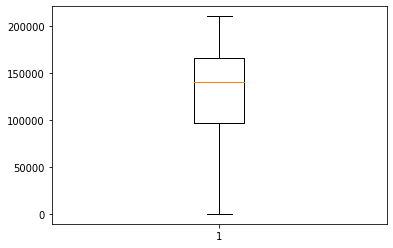

In [35]:
dataset[dataset['Allocated_memory']<0]    
dataset = dataset.drop(dataset[dataset.Allocated_memory < 0 ].index)
plt.boxplot(dataset['Allocated_memory'])

DATASET READING

In [36]:
dataset

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,total_processing_time
16,17,34.16800,vp8,480.0,360.0,186895.0,30.029411,16.0,6531.409699,0.0,1021.0,238485.0,559745.0,0.0,798230.0,flv,820000.0,29.97,1920.0,1080.0,165700.0,5.884
19,20,316.95166,mpeg4,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,2194752.0,vp8,5000000.0,15.00,1280.0,720.0,165700.0,14.185
25,26,204.93800,h264,480.0,360.0,297373.0,16.000000,111.0,6531.409699,0.0,3280.0,1451634.0,6166260.0,0.0,7617894.0,h264,109000.0,12.00,640.0,480.0,143864.0,5.208
49,50,316.95166,mpeg4,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,2194752.0,h264,539000.0,25.00,480.0,360.0,165700.0,7.840
51,52,204.93800,h264,480.0,360.0,297373.0,16.000000,111.0,3169.000000,0.0,3280.0,1451634.0,6166260.0,0.0,7617894.0,flv,3000000.0,29.97,480.0,360.0,90560.0,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48125,48126,59.88300,vp8,1280.0,720.0,994960.0,30.389830,13.0,1780.000000,0.0,1793.0,481774.0,6965881.0,0.0,7447655.0,mpeg4,242000.0,15.00,176.0,144.0,155028.0,3.320
48128,48129,40.84100,h264,480.0,360.0,310175.0,29.000000,22.0,1203.000000,0.0,1225.0,289806.0,1293681.0,0.0,1583487.0,h264,5000000.0,15.00,640.0,480.0,144584.0,27.526
48140,48141,130.35667,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.000000,0.0,1564.0,64483.0,825054.0,0.0,889537.0,h264,109000.0,29.97,640.0,480.0,134892.0,9.101
48141,48142,216.55000,h264,320.0,240.0,291150.0,29.000000,112.0,6379.000000,0.0,6491.0,1789334.0,6091735.0,0.0,7881069.0,flv,539000.0,24.00,1280.0,720.0,206608.0,2.636


ENCODING THE VARIABLES

In [37]:
df_1 = pd.get_dummies(dataset["coding_standard"])
df_1.head()

,flv,h264,mpeg4,vp8
16,0,0,0,1
19,0,0,1,0
25,0,1,0,0
49,0,0,1,0
51,0,1,0,0


In [38]:
df_2 =  pd.get_dummies(dataset["coding_standard_output"])
df_2.rename({"flv":"flv_out", "h264":"h264_out", "mpeg4":"mpeg4_out", "vp8":"vp8_out"}, axis="columns",inplace=True)
df_2.head()


,flv_out,h264_out,mpeg4_out,vp8_out
16,1,0,0,0
19,0,0,0,1
25,0,1,0,0
49,0,1,0,0
51,1,0,0,0


In [39]:
dataset.drop(columns=['id', 'coding_standard', 'coding_standard_output'], inplace=True)
final_dataset = pd.concat([dataset, df_1],axis = 1)
final_dataset = pd.concat([final_dataset, df_2],axis = 1)
final_dataset.head()

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,size,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,total_processing_time,flv,h264,mpeg4,vp8,flv_out,h264_out,mpeg4_out,vp8_out
16,34.16800,480.0,360.0,186895.0,30.029411,16.0,6531.409699,0.0,1021.0,238485.0,559745.0,0.0,798230.0,820000.0,29.97,1920.0,1080.0,165700.0,5.884,0,0,0,1,1,0,0,0
19,316.95166,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,2194752.0,5000000.0,15.00,1280.0,720.0,165700.0,14.185,0,0,1,0,0,0,0,1
25,204.93800,480.0,360.0,297373.0,16.000000,111.0,6531.409699,0.0,3280.0,1451634.0,6166260.0,0.0,7617894.0,109000.0,12.00,640.0,480.0,143864.0,5.208,0,1,0,0,0,1,0,0
49,316.95166,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,2194752.0,539000.0,25.00,480.0,360.0,165700.0,7.840,0,0,1,0,0,1,0,0
51,204.93800,480.0,360.0,297373.0,16.000000,111.0,3169.000000,0.0,3280.0,1451634.0,6166260.0,0.0,7617894.0,3000000.0,29.97,480.0,360.0,90560.0,0.800,0,1,0,0,1,0,0,0


In [40]:
new = list(final_dataset["total_processing_time"])
final_dataset.drop(columns="total_processing_time", inplace = True)
final_dataset['total_processing_time'] = new
final_dataset.head()

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,size,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,flv,h264,mpeg4,vp8,flv_out,h264_out,mpeg4_out,vp8_out,total_processing_time
16,34.16800,480.0,360.0,186895.0,30.029411,16.0,6531.409699,0.0,1021.0,238485.0,559745.0,0.0,798230.0,820000.0,29.97,1920.0,1080.0,165700.0,0,0,0,1,1,0,0,0,5.884
19,316.95166,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,2194752.0,5000000.0,15.00,1280.0,720.0,165700.0,0,0,1,0,0,0,0,1,14.185
25,204.93800,480.0,360.0,297373.0,16.000000,111.0,6531.409699,0.0,3280.0,1451634.0,6166260.0,0.0,7617894.0,109000.0,12.00,640.0,480.0,143864.0,0,1,0,0,0,1,0,0,5.208
49,316.95166,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,2194752.0,539000.0,25.00,480.0,360.0,165700.0,0,0,1,0,0,1,0,0,7.840
51,204.93800,480.0,360.0,297373.0,16.000000,111.0,3169.000000,0.0,3280.0,1451634.0,6166260.0,0.0,7617894.0,3000000.0,29.97,480.0,360.0,90560.0,0,1,0,0,1,0,0,0,0.800


DROPPING THE SIZE COLUMN

In [41]:
final_dataset.drop(columns=['size'], inplace = True)

In [42]:
final_dataset

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,flv,h264,mpeg4,vp8,flv_out,h264_out,mpeg4_out,vp8_out,total_processing_time
16,34.16800,480.0,360.0,186895.0,30.029411,16.0,6531.409699,0.0,1021.0,238485.0,559745.0,0.0,820000.0,29.97,1920.0,1080.0,165700.0,0,0,0,1,1,0,0,0,5.884
19,316.95166,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,5000000.0,15.00,1280.0,720.0,165700.0,0,0,1,0,0,0,0,1,14.185
25,204.93800,480.0,360.0,297373.0,16.000000,111.0,6531.409699,0.0,3280.0,1451634.0,6166260.0,0.0,109000.0,12.00,640.0,480.0,143864.0,0,1,0,0,0,1,0,0,5.208
49,316.95166,176.0,144.0,55396.0,12.000000,64.0,3739.000000,0.0,3803.0,111850.0,2082902.0,0.0,539000.0,25.00,480.0,360.0,165700.0,0,0,1,0,0,1,0,0,7.840
51,204.93800,480.0,360.0,297373.0,16.000000,111.0,3169.000000,0.0,3280.0,1451634.0,6166260.0,0.0,3000000.0,29.97,480.0,360.0,90560.0,0,1,0,0,1,0,0,0,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48125,59.88300,1280.0,720.0,994960.0,30.389830,13.0,1780.000000,0.0,1793.0,481774.0,6965881.0,0.0,242000.0,15.00,176.0,144.0,155028.0,0,0,0,1,0,0,1,0,3.320
48128,40.84100,480.0,360.0,310175.0,29.000000,22.0,1203.000000,0.0,1225.0,289806.0,1293681.0,0.0,5000000.0,15.00,640.0,480.0,144584.0,0,1,0,0,0,1,0,0,27.526
48140,130.35667,176.0,144.0,54590.0,12.000000,27.0,1537.000000,0.0,1564.0,64483.0,825054.0,0.0,109000.0,29.97,640.0,480.0,134892.0,0,0,1,0,0,1,0,0,9.101
48141,216.55000,320.0,240.0,291150.0,29.000000,112.0,6379.000000,0.0,6491.0,1789334.0,6091735.0,0.0,539000.0,24.00,1280.0,720.0,206608.0,0,1,0,0,1,0,0,0,2.636


In [43]:
data.drop(columns=['size'], inplace = True)

In [44]:
data

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,Allocated_memory
0,48151,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,12.0,320.0,240.0,25164.0
1,48152,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,12.0,1280.0,720.0,58528.0
2,48153,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,12.0,1920.0,1080.0,102072.0
3,48154,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,15.0,1920.0,1080.0,102072.0
4,48155,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,25.0,640.0,480.0,34308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,68780,807.974000,h264,480.0,360.0,355622.0,29.000000,433.0,23783.0,0.0,24216.0,6406304.0,29510436.0,0.0,vp8,5000000.0,25.0,640.0,480.0,88112.0
20630,68781,59.482998,h264,480.0,360.0,330241.0,29.000000,61.0,1722.0,0.0,1783.0,1147618.0,1307848.0,0.0,h264,242000.0,15.0,480.0,360.0,103504.0
20631,68782,128.061000,flv,320.0,240.0,257217.0,29.000000,66.0,3773.0,0.0,3839.0,743566.0,3373880.0,0.0,vp8,5000000.0,12.0,0.0,144.0,88444.0
20632,68783,249.680000,vp8,320.0,240.0,359345.0,25.068274,129.0,6113.0,0.0,6242.0,1758664.0,9456514.0,0.0,vp8,539000.0,12.0,176.0,144.0,88708.0


GENERATING MODELS FOR OUR DATASET

In [45]:
X = final_dataset.iloc[:,:-1].values
y = final_dataset.iloc[:,-1].values

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 500)

In [47]:
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (5202, 25)
X_test : (579, 25)
y_train : (5202,)
y_test : (579,)


In [48]:
print(y_test)

[ 0.688  3.336 16.225  1.76   7.9    2.628  1.78   2.232 19.197  2.3
  3.304  6.164  0.284  7.464  3.408  1.968  1.336  1.196  3.116 18.537
  2.352  2.292  5.16   3.072  3.884  2.5   21.277  9.345 37.966  1.38
  0.38   3.192  2.088 22.677 25.834  1.564  0.284  3.86   1.58   1.096
  4.688  1.376  2.204  1.132  7.896  8.829 10.277  0.632  2.712  3.136
  2.152 23.701 31.438  6.436  0.656  5.936  0.664  2.084  3.908  2.596
  6.732  2.996  3.908  6.896  3.94   2.     2.972  2.66   1.964  0.328
  0.8    0.656  0.892  6.116  3.496  1.164  0.912  1.976  1.32  15.493
  7.852  1.904  0.364  0.464  3.172  7.108  6.452  2.492  0.876  3.292
  3.02   3.08   1.076  0.484  6.32   2.32  39.522  0.328  0.652  3.08
  4.276  2.636  1.584 11.573 11.625  1.388 16.137  2.512  4.148  8.253
  0.98   0.992 20.281  1.992  4.376  2.628  2.292  5.664  4.008  3.108
 12.661  6.208  1.84  17.681  1.384  0.32   1.852 13.265  0.364  5.344
  2.16   6.364  0.488  3.312 11.413  2.424  3.28   4.964  3.048 32.998
  5.424  4

DECISION TREE REGRESSION

In [49]:
from sklearn.tree import DecisionTreeRegressor
regressor3 = DecisionTreeRegressor(random_state = 0)
regressor3.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [50]:
y_pred3 = regressor3.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.reshape(len(y_test),1)),1))

[[ 0.64  0.69]
 [ 3.49  3.34]
 [16.73 16.23]
 ...
 [61.58 60.06]
 [37.88 39.35]
 [ 4.05  4.06]]


In [51]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

0.9190556901960484

In [52]:
a = regressor3.score(X_test,y_test)

RANDOM FOREST REGRESSOR MODEL

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor4 = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regressor4.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [54]:
y_pred4 = regressor4.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.reshape(len(y_test),1)),1))

[[ 0.59  0.69]
 [ 3.46  3.34]
 [17.15 16.23]
 ...
 [54.93 60.06]
 [37.57 39.35]
 [ 4.05  4.06]]


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred4)

0.9458487913271405

In [56]:
print(y_pred4)

[ 0.59  3.46 17.15  1.87  7.9   2.91  1.74  2.17 20.07  2.23  3.23  6.3
  0.3   7.75  3.66  1.93  1.37  1.22  3.18 16.03  2.05  2.23  5.04  3.05
  3.88  2.46 20.94  8.23 42.99  1.42  0.38  3.57  1.93 23.05 24.06  1.5
  0.3   3.33  1.42  1.08  4.38  1.4   2.2   1.12  8.97  9.37 10.2   0.63
  2.71  2.86  2.05 22.54 26.92  6.45  0.67  5.81  0.66  1.96  4.25  2.79
  6.81  3.13  3.96  7.53  4.24  2.13  2.95  2.69  1.91  0.33  0.78  0.66
  0.9   6.19  3.52  1.11  0.87  1.89  1.28 16.19  7.82  1.85  0.36  0.48
  3.41  6.74  6.49  2.5   0.86  3.22  3.15  2.98  1.1   0.47  6.34  2.4
 40.4   0.32  0.66  3.23  4.64  2.49  1.66 12.04 11.59  1.41 15.94  2.36
  4.12  9.3   0.98  1.01 21.48  2.04  4.3   1.75  2.34  6.29  6.17  3.05
 11.95  6.34  1.85 18.19  1.37  0.32  2.06 13.22  0.37  5.2   2.25  6.37
  0.48  3.15  8.96  2.42  3.57  4.96  3.04 33.02  4.6   3.88  5.21  8.21
 12.77 16.34  1.93  2.24  2.4  44.97  7.76 12.38  8.78  0.63 40.19  8.91
  0.6  12.82 19.39  6.29  2.33  8.5   8.43  2.5  21.67

In [57]:
b = regressor4.score(X_test,y_test)

XG BOOST MODEL

In [58]:
import xgboost as xgb
from sklearn.metrics import r2_score
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 1000)
xg_reg.fit(X_train,y_train)

[11:13:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [59]:
xgb_pred = xg_reg.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((xgb_pred.reshape(len(xgb_pred),1), y_test.reshape(len(y_test),1)),1))

[[-0.18  0.69]
 [ 3.69  3.34]
 [14.93 16.23]
 ...
 [44.61 60.06]
 [30.99 39.35]
 [ 4.19  4.06]]


In [60]:
r2_score(y_test,xgb_pred)

0.9196017562695583

In [61]:
c = xg_reg.score(X_test,y_test)

GRADIENT BOOSTER MODEL

In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gradientbooster = GradientBoostingRegressor(loss = 'ls', learning_rate = 0.50, n_estimators = 128, max_depth = 11)
gradientbooster.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.5, loss='ls', max_depth=11,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=128,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [63]:
grad_pred = gradientbooster.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((grad_pred.reshape(len(grad_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.65  0.69]
 [ 3.45  3.34]
 [16.76 16.23]
 ...
 [47.13 60.06]
 [37.89 39.35]
 [ 4.06  4.06]]


In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,grad_pred)

0.9423630161959583

In [65]:
d = gradientbooster.score(X_test,y_test)

In [66]:
d

0.9423630161959583

BAGGING REGRESSION MODEL

In [67]:
from sklearn.ensemble import BaggingRegressor
bagging = BaggingRegressor(n_estimators = 128)
bagging.fit(X_train,y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=128,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)

In [68]:
bag_pred = bagging.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((bag_pred.reshape(len(bag_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 0.59  0.69]
 [ 3.47  3.34]
 [17.06 16.23]
 ...
 [55.54 60.06]
 [37.5  39.35]
 [ 4.03  4.06]]


In [69]:
from sklearn.metrics import r2_score
r2_score(y_test,bag_pred)

0.9458810387244619

In [70]:
e = bagging.score(X_test,y_test)

WORKING ON THE TEST DATASET

In [71]:
data

,id,video_duration,coding_standard,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,coding_standard_output,bitrate_output,framerate_output,output_width,output_height,Allocated_memory
0,48151,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,12.0,320.0,240.0,25164.0
1,48152,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,12.0,1280.0,720.0,58528.0
2,48153,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,12.0,1920.0,1080.0,102072.0
3,48154,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,15.0,1920.0,1080.0,102072.0
4,48155,130.356670,mpeg4,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,mpeg4,56000.0,25.0,640.0,480.0,34308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,68780,807.974000,h264,480.0,360.0,355622.0,29.000000,433.0,23783.0,0.0,24216.0,6406304.0,29510436.0,0.0,vp8,5000000.0,25.0,640.0,480.0,88112.0
20630,68781,59.482998,h264,480.0,360.0,330241.0,29.000000,61.0,1722.0,0.0,1783.0,1147618.0,1307848.0,0.0,h264,242000.0,15.0,480.0,360.0,103504.0
20631,68782,128.061000,flv,320.0,240.0,257217.0,29.000000,66.0,3773.0,0.0,3839.0,743566.0,3373880.0,0.0,vp8,5000000.0,12.0,0.0,144.0,88444.0
20632,68783,249.680000,vp8,320.0,240.0,359345.0,25.068274,129.0,6113.0,0.0,6242.0,1758664.0,9456514.0,0.0,vp8,539000.0,12.0,176.0,144.0,88708.0


In [72]:
data.dtypes

id                          int64
video_duration            float64
coding_standard            object
width                     float64
height                    float64
bitrate                   float64
framerate                 float64
i_frames                  float64
p_frames                  float64
b_frames                  float64
frames                    float64
i_size                    float64
p_size                    float64
b_size                    float64
coding_standard_output     object
bitrate_output            float64
framerate_output          float64
output_width              float64
output_height             float64
Allocated_memory          float64
dtype: object

In [73]:
data.isnull().sum()

id                         0
video_duration             5
coding_standard            0
width                      4
height                     2
bitrate                    9
framerate                 13
i_frames                  11
p_frames                   3
b_frames                   9
frames                    10
i_size                     8
p_size                     9
b_size                     2
coding_standard_output     0
bitrate_output             5
framerate_output           8
output_width               5
output_height              7
Allocated_memory           2
dtype: int64

WORKING ON THE NULL VALUES

In [74]:
data["width"].fillna( method ='ffill', inplace = True) 
data["height"].fillna( method ='ffill', inplace = True) 

data['framerate'].fillna((data['framerate'].mean()), inplace=True)
data['i_frames'].fillna((data['i_frames'].mean()), inplace=True)
data['frames'].fillna((data['frames'].mean()), inplace=True)
data['i_size'].fillna((data['i_size'].mean()), inplace=True)
data['p_size'].fillna((data['p_size'].mean()), inplace=True)
data['b_size'].fillna((data['b_size'].mean()), inplace=True)

data['framerate_output'].fillna((data['framerate_output'].mean()), inplace=True)
data['output_width'].fillna((data['output_width'].mean()), inplace=True)

data['video_duration'].fillna((data['video_duration'].mean()), inplace=True)
data['output_height'].fillna((data['output_height'].mean()), inplace=True)
data['Allocated_memory'].fillna((data['Allocated_memory'].mean()), inplace=True)
data['b_frames'].fillna((data['b_frames'].mean()), inplace=True)
data['p_frames'].fillna((data['p_frames'].mean()), inplace=True)
data['bitrate'].fillna((data['bitrate'].mean()), inplace=True)
data['bitrate_output'].fillna((data['bitrate_output'].mean()), inplace=True)

In [75]:
data.isnull().sum()

id                        0
video_duration            0
coding_standard           0
width                     0
height                    0
bitrate                   0
framerate                 0
i_frames                  0
p_frames                  0
b_frames                  0
frames                    0
i_size                    0
p_size                    0
b_size                    0
coding_standard_output    0
bitrate_output            0
framerate_output          0
output_width              0
output_height             0
Allocated_memory          0
dtype: int64

ENCODING TEST SET VARIABLES

In [76]:
df_test_1 = pd.get_dummies(data["coding_standard"])
df_test_1.head()

,flv,h264,mpeg4,vp8
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [77]:
df_test_2 = pd.get_dummies(data["coding_standard_output"])
df_test_2.rename({"flv":"flv_out", "h264":"h264_out", "mpeg4":"mpeg4_out", "vp8":"vp8_out"}, axis="columns",inplace=True)
df_test_2.head()

,flv_out,h264_out,mpeg4_out,vp8_out
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [78]:
ids = list(data['id'])
data.drop(columns=['id', 'coding_standard', 'coding_standard_output'], inplace=True)
data = pd.concat([data, df_test_1],axis = 1)
data = pd.concat([data, df_test_2],axis = 1)
data.head()

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,flv,h264,mpeg4,vp8,flv_out,h264_out,mpeg4_out,vp8_out
0,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,56000.0,12.0,320.0,240.0,25164.0,0,0,1,0,0,0,1,0
1,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,56000.0,12.0,1280.0,720.0,58528.0,0,0,1,0,0,0,1,0
2,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,56000.0,12.0,1920.0,1080.0,102072.0,0,0,1,0,0,0,1,0
3,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,56000.0,15.0,1920.0,1080.0,102072.0,0,0,1,0,0,0,1,0
4,130.35667,176.0,144.0,54590.0,12.0,27.0,1537.0,0.0,1564.0,64483.0,825054.0,0.0,56000.0,25.0,640.0,480.0,34308.0,0,0,1,0,0,0,1,0


In [79]:
data

,video_duration,width,height,bitrate,framerate,i_frames,p_frames,b_frames,frames,i_size,p_size,b_size,bitrate_output,framerate_output,output_width,output_height,Allocated_memory,flv,h264,mpeg4,vp8,flv_out,h264_out,mpeg4_out,vp8_out
0,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.000000,6.448300e+04,825054.0,0.0,56000.0,12.0,320.0,240.0,25164.0,0,0,1,0,0,0,1,0
1,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.000000,6.448300e+04,825054.0,0.0,56000.0,12.0,1280.0,720.0,58528.0,0,0,1,0,0,0,1,0
2,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.000000,6.448300e+04,825054.0,0.0,56000.0,12.0,1920.0,1080.0,102072.0,0,0,1,0,0,0,1,0
3,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.000000,6.448300e+04,825054.0,0.0,56000.0,15.0,1920.0,1080.0,102072.0,0,0,1,0,0,0,1,0
4,130.356670,176.0,144.0,54590.0,12.000000,27.0,1537.0,0.0,1564.000000,6.448300e+04,825054.0,0.0,56000.0,25.0,640.0,480.0,34308.0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20629,807.974000,480.0,360.0,355622.0,29.000000,433.0,23783.0,0.0,24216.000000,6.406304e+06,29510436.0,0.0,5000000.0,25.0,640.0,480.0,88112.0,0,1,0,0,0,0,0,1
20630,59.482998,480.0,360.0,330241.0,29.000000,61.0,1722.0,0.0,1783.000000,1.147618e+06,1307848.0,0.0,242000.0,15.0,480.0,360.0,103504.0,0,1,0,0,0,1,0,0
20631,128.061000,320.0,240.0,257217.0,29.000000,66.0,3773.0,0.0,3839.000000,7.435660e+05,3373880.0,0.0,5000000.0,12.0,0.0,144.0,88444.0,1,0,0,0,0,0,0,1
20632,249.680000,320.0,240.0,359345.0,25.068274,129.0,6113.0,0.0,6242.000000,1.758664e+06,9456514.0,0.0,539000.0,12.0,176.0,144.0,88708.0,0,0,0,1,0,0,0,1


PREDICTIONS TIME

In [80]:
final_dataset.columns

Index(['video_duration', 'width', 'height', 'bitrate', 'framerate', 'i_frames',
       'p_frames', 'b_frames', 'frames', 'i_size', 'p_size', 'b_size',
       'bitrate_output', 'framerate_output', 'output_width', 'output_height',
       'Allocated_memory', 'flv', 'h264', 'mpeg4', 'vp8', 'flv_out',
       'h264_out', 'mpeg4_out', 'vp8_out', 'total_processing_time'],
      dtype='object')

In [81]:
data.columns

Index(['video_duration', 'width', 'height', 'bitrate', 'framerate', 'i_frames',
       'p_frames', 'b_frames', 'frames', 'i_size', 'p_size', 'b_size',
       'bitrate_output', 'framerate_output', 'output_width', 'output_height',
       'Allocated_memory', 'flv', 'h264', 'mpeg4', 'vp8', 'flv_out',
       'h264_out', 'mpeg4_out', 'vp8_out'],
      dtype='object')

In [82]:
x1 = data.iloc[:,0:25].values

In [83]:
prediction1 = np.array(regressor3.predict(x1))
prediction2 = np.array(regressor4.predict(x1))
prediction3 = np.array(xg_reg.predict(x1))
prediction4 = np.array(gradientbooster.predict(x1))
prediction5 = np.array(bagging.predict(x1))

In [84]:
prediction1

array([0.97, 3.26, 6.28, ..., 1.4 , 1.92, 3.53])

In [85]:
prediction2

array([0.96, 3.47, 6.74, ..., 1.55, 1.97, 3.41])

In [86]:
prediction3

array([1.01, 3.19, 6.97, ..., 4.27, 2.03, 5.43], dtype=float32)

In [87]:
prediction4

array([0.86, 3.13, 6.06, ..., 1.56, 1.92, 2.97])

In [88]:
prediction5

array([0.95, 3.5 , 6.79, ..., 1.53, 2.01, 3.48])

In [89]:
pred_df = pd.DataFrame({'Decision Tree ':prediction1, 'Random Forest':prediction2, 'XG Boost':prediction3, 'Gradient Booster':prediction4, 'Bagging':prediction5})
pred_df.head()

,Decision Tree,Random Forest,XG Boost,Gradient Booster,Bagging
0,0.968,0.960720,1.010925,0.856436,0.949750
1,3.264,3.471376,3.188566,3.132076,3.501906
2,6.276,6.735412,6.969596,6.063433,6.790883
3,7.700,7.919864,7.786426,7.728002,7.924859
4,2.932,2.643488,2.315714,2.874237,2.632313


In [99]:
final_predictions = (prediction1*0.2 + prediction2*0.2 + prediction3*0.4 + prediction4*0.1 + prediction5*0.1)

In [100]:
final_predictions[:5]

array([0.97, 3.29, 6.68, 7.8 , 2.59])

In [101]:
print(final_predictions)

[0.97 3.29 6.68 ... 2.61 1.98 4.21]


GENERATING THE SUBMISSIONS FILE

In [92]:
sub = pd.DataFrame({'id':ids, 'total_processing_time': final_predictions})
sub.to_csv("Submission.csv", index=False)